변수명	                              설명

CRIM	                          지역별 1인당 범죄율


ZN	                  25,000 평방피트를 초과하는 거주 구역 비율

INDUS	                   비소매 상업 지역 면적 비율

CHAS	             찰스 강과의 인접 여부 (1: 인접, 0: 인접하지 않음)

NOX	                   일산화질소 농도 (공기 오염 지표)

RM	                      주택 1가구당 평균 방 개수

AGE	                   1940년 이전에 건설된 자가주택 비율

DIS	                       5개 주요 고용센터와의 거리

RAD	                         방사형 도로 접근성 지수

TAX                      	재산세율 (10,000달러당)

PTRATIO	                      지역별 학생-교사 비율

B	                  지역별 흑인 비율 (1000(Bk - 0.63)^2, Bk는 흑인 비율)

LSTAT	                   하위 계층 비율 (%)

MEDV	                  주택 가격 중앙값 (단위: 1,000달러)

CAT.MEDV	           주택 가격 중앙값을 카테고리화한 변수 (주택 가격이 일정 금액 이상이면 1, 아니면 0으로 분류)

In [3]:
!pip install -qU unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 7.9 MB/s eta 0:00:00


In [15]:
import pandas as pd

df = pd.read_csv('/content/data/house_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [27]:
from langchain_community.document_loaders.csv_loader import UnstructuredCSVLoader

loader = UnstructuredCSVLoader(file_path = '/content/data/house_price.csv', mode = "elements")
docs = loader.load()

print(docs[0].metadata["text_as_html"][:2213])

<table><tr><td>CRIM</td><td>ZN</td><td>INDUS</td><td>CHAS</td><td>NOX</td><td>RM</td><td>AGE</td><td>DIS</td><td>RAD</td><td>TAX</td><td>PTRATIO</td><td>B</td><td>LSTAT</td><td>MEDV</td><td>CAT.MEDV</td></tr><tr><td>0.00632</td><td>18</td><td>2.31</td><td>0</td><td>0.538</td><td>6.575</td><td>65.2</td><td>4.09</td><td>1</td><td>296</td><td>15.3</td><td>396.9</td><td>4.98</td><td>24</td><td>0</td></tr><tr><td>0.02731</td><td>0</td><td>7.07</td><td>0</td><td>0.469</td><td>6.421</td><td>78.9</td><td>4.9671</td><td>2</td><td>242</td><td>17.8</td><td>396.9</td><td>9.14</td><td>21.6</td><td>0</td></tr><tr><td>0.02729</td><td>0</td><td>7.07</td><td>0</td><td>0.469</td><td>7.185</td><td>61.1</td><td>4.9671</td><td>2</td><td>242</td><td>17.8</td><td>392.83</td><td>4.03</td><td>34.7</td><td>1</td></tr><tr><td>0.03237</td><td>0</td><td>2.18</td><td>0</td><td>0.458</td><td>6.998</td><td>45.8</td><td>6.0622</td><td>3</td><td>222</td><td>18.7</td><td>394.63</td><td>2.94</td><td>33.4</td><td>1</td></

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


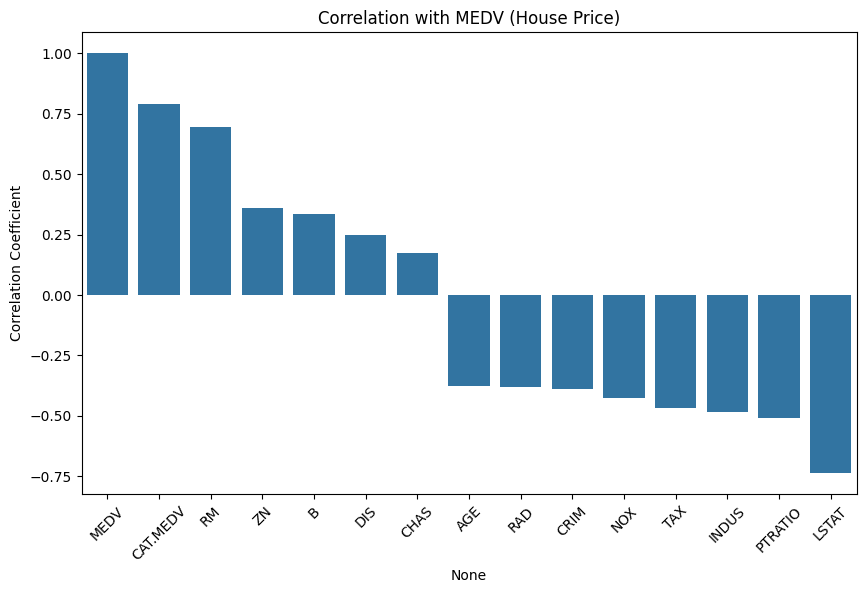


Top 3 variables excluding CAT.MEDV and MEDV:
 Index(['LSTAT', 'RM', 'PTRATIO'], dtype='object')

Regression Coefficients:
    Feature  Coefficient
0    LSTAT    -0.567126
1       RM     4.933118
2  PTRATIO    -0.867095

Mean Squared Error (MSE): 27.11495741558059
R-squared (R2): 0.6302528487272826


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 로드
# 데이터 파일 경로를 지정하여 CSV 파일을 DataFrame으로 읽음
file_path = '/content/data/house_price.csv'
data = pd.read_csv(file_path)

# 2. 데이터 구조 확인
# 데이터의 기본 정보를 출력하여 열 이름, 데이터 유형, 결측값 유무를 확인
data.info()

# 3. 상관 분석
# 각 변수와 MEDV 간의 상관계수를 계산
correlation_matrix = data.corr()  # 데이터의 상관계수 행렬 계산
correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)  # MEDV 기준으로 상관계수 정렬

# 상관 관계를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_medv.index, y=correlation_with_medv.values)
plt.title('Correlation with MEDV (House Price)')  # 그래프 제목
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.ylabel('Correlation Coefficient')  # y축 레이블
plt.show()

# CAT.MEDV와 MEDV 제외 후 상위 3개 변수 추출
# 'MEDV'와 'CAT.MEDV'를 제외한 변수들 중에서 상관계수 절댓값 기준 상위 3개 변수 선택
top_features = correlation_with_medv[~correlation_with_medv.index.isin(['MEDV', 'CAT.MEDV'])].abs().sort_values(ascending=False).head(3).index
print("\nTop 3 variables excluding CAT.MEDV and MEDV:\n", top_features)

# 4. 회귀 분석
# 주요 변수 선택
# 앞에서 선택한 상위 3개 변수(`top_features`)를 설명 변수로 설정
X = data[top_features]  # 입력 데이터 (설명 변수)
y = data['MEDV']  # 타겟 데이터 (목표 변수)

# 데이터 분할
# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 훈련
# 선형 회귀 모델 생성 및 학습 데이터로 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 성능 평가
# 테스트 데이터를 사용해 주택 가격 예측
y_pred = model.predict(X_test)

# 모델 성능 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)  # 평균 제곱 오차 (MSE)
r2 = r2_score(y_test, y_pred)  # 결정 계수 (R²)

# 회귀 계수 확인
# 각 변수의 회귀 계수를 DataFrame 형태로 정리
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# 결과 출력
print("\nRegression Coefficients:\n", coefficients)  # 회귀 계수 출력
print("\nMean Squared Error (MSE):", mse)  # MSE 출력
print("R-squared (R2):", r2)  # R² 출력
